<a href="https://colab.research.google.com/github/swalehaparvin/ML_for_CyberSecurity/blob/main/DDoS_attack_prediction_using_ARIMA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook uses ARIMA (AutoRegressive Integrated Moving Average) for time  series forecasting and predicts DDoS attack patterns (given the variable names)

Uses a window of historical data (new_count_df) to make predictions

Calculates the mean squared error between predictions and actual data

The ARIMA model has parameters (10,1,0) meaning:

*   10 autoregressive terms
*  1 degree of differencing
*   0 moving average terms

## What is ARIMA?

ARIMA (AutoRegressive Integrated Moving Average) is a popular forecasting method used for time series data.

It combines autoregressive (AR) and moving average (MA) models, and uses differencing (I) to make the data stationary if needed. ARIMA models are defined by three parameters (p, d, q), representing the order of the AR, differencing, and MA components, respectively.

### **ARIMA is like predicting your TikTok followers 🎤**  
Imagine you’re trying to guess how many followers you’ll have next month. ARIMA helps by looking at three things:  

1. **AR (AutoRegressive) – "Your past habits"**  
   - *"How many followers you gained last month affects this month."*  
   - Example: If you gained 100 followers every time you posted a dance video, ARIMA notices that pattern.  

2. **I (Integrated) – "Detoxing the drama"**  
   - *"Removes weird spikes (like that one viral meme that messed up your trends)."*  
   - Example: If you suddenly lost 1,000 followers because of a glitch, ARIMA "cleans" the data to focus on the real trend.  

3. **MA (Moving Average) – "Unexpected surprises"**  
   - *"How random events (like a celeb sharing your video) affect your growth."*  
   - Example: That time you got 500 followers overnight because someone famous commented? MA accounts for those random pops.  

---

### **The (p, d, q) Secret Code 🔍**  
ARIMA uses three numbers to set the rules:  
- **p (Past):** How many past months to check (e.g., "Last 3 months matter").  
- **d (Detox):** How many times to clean the data (e.g., "Remove 1 weird spike").  
- **q (Randomness):** How many surprises to include (e.g., "Account for 2 random events").  

---

### **Real-Life Example**  
**Problem:** Predict next month’s ice cream sales 🍦.  
- **AR (p=2):** Checks sales from the last 2 months.  
- **I (d=1):** Adjusts for a heatwave that made sales crazy last summer.  
- **MA (q=1):** Adds a fudge factor because sometimes sales jump randomly.  

Result: A forecast that’s *just right*—like Goldilocks’ porridge!  

---

### **Why It’s Cool**  
- No crystal ball needed 🔮—just math that learns from patterns.  
- Used for *everything*: Stock prices, weather, even how many people will ride the subway.  

**You got this!** 🚀 (And if your brain glazed over, just remember: *ARIMA = Past + Clean Data + Random Stuff*.)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA  # Note: Updated import
from sklearn.metrics import mean_squared_error


df = pd.read_csv('airline_data.csv', parse_dates=['Month'], index_col='Month')

# ARIMA forecasting
history = df['#Passengers'].values
predictions = []
for t in range(12, len(history)):
    model = ARIMA(history[:t], order=(10,1,0))  # Try (p,d,q)=(2,1,1) for better results
    fitted_model = model.fit()
    output = fitted_model.forecast()
    predictions.append(output[0])

# Calculate error. The first actual value is not included in the prediction list, so we need to slice the history array to match the predictions length.
error = mean_squared_error(history[12:], predictions)
print(f"Mean Squared Error: {error}")

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarn

Mean Squared Error: 617.1719021083069


Predicting DDoS attack patterns involves analyzing network traffic and using machine learning to identify anomalies that precede attacks.

This proactive approach allows organizations to implement preventative measures, minimizing the impact of attacks. Key indicators include sudden traffic spikes, unusual access patterns, and increased connection requests

In [ ]:
ddos_predictions = list()
history_data = history
for ddos in range(12, len(history_data)):
  model = ARIMA(history_data[:ddos+1], order=(10,1,0))
  fitted_model = model.fit()
  output =fitted_model.forecast()
  pred = output[0]
  ddos_predictions.append(pred)

error = mean_squared_error(history_data[12:],ddos_predictions)
print(f"Mean Squared Error: {error}")

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarn

Mean Squared Error: 561.8277833528803


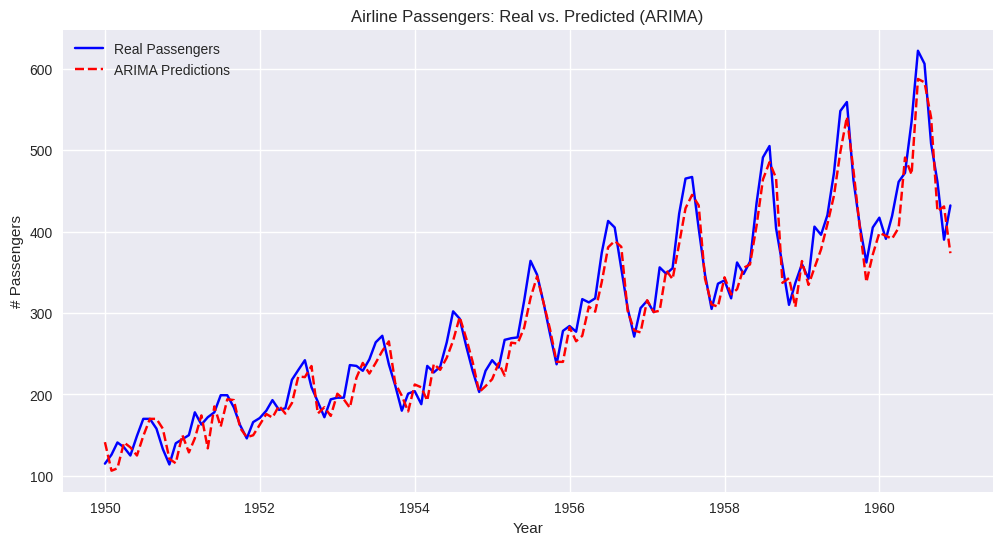

In [ ]:
# Plot the real passengers vs. your ARIMA predictions
plt.figure(figsize=(12, 6))  # Bigger canvas = less squished
plt.plot(df.index[12:], history[12:], label='Real Passengers', color='blue')  # Real data
plt.plot(df.index[12:], predictions, label='ARIMA Predictions', color='red', linestyle='--')  # Your guesses
plt.title("Airline Passengers: Real vs. Predicted (ARIMA)")
plt.xlabel("Year")
plt.ylabel("# Passengers")
plt.legend()
plt.grid(True)
plt.show()

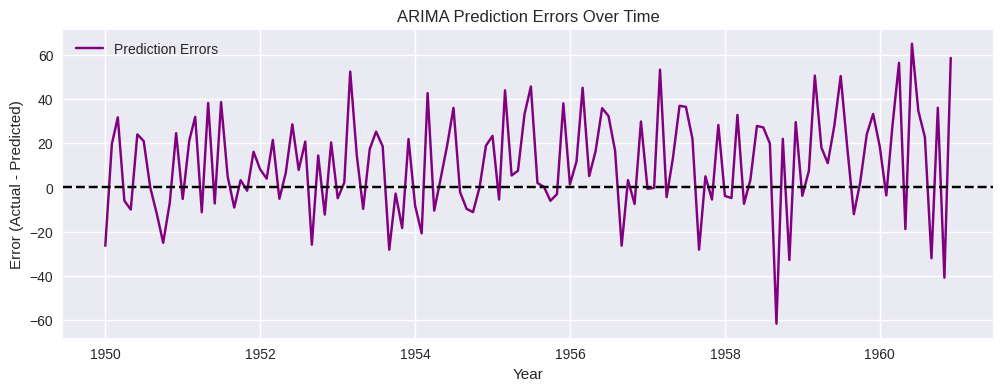

In [ ]:
# Plot prediction errors (actual - predicted)
errors = history[12:] - predictions
plt.figure(figsize=(12, 4))
plt.plot(df.index[12:], errors, color='purple', label='Prediction Errors')
plt.axhline(y=0, color='black', linestyle='--')  # Adds a "zero" reference line
plt.title("ARIMA Prediction Errors Over Time")
plt.xlabel("Year")
plt.ylabel("Error (Actual - Predicted)")
plt.legend()
plt.grid(True)
plt.show()